# Simple trading strategy using Simple Moving Average

## Install packages

In [ ]:
%pip install --upgrade pip

In [ ]:
%pip install pandas

In [ ]:
%pip install matplotlib

In [1]:
%pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 4.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [2]:
fb = pd.read_csv('./data/facebook.csv', index_col='Date')
ms = pd.read_csv('./data/microsoft.csv', index_col='Date')

## Create PriceDiff column

Price diff between two days

In [3]:
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']
fb['PriceDiff']

Date
2014-12-31     0.080000
2015-01-02    -0.339998
2015-01-05    -0.600000
2015-01-06    -0.050002
2015-01-07     0.720002
                ...    
2018-01-30     3.080002
2018-01-31    -5.300003
2018-02-01    -6.979996
2018-02-02   -19.820007
2018-02-05          NaN
Name: PriceDiff, Length: 780, dtype: float64

In [4]:
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']
ms.loc['2015-01-05', 'PriceDiff']

-0.6799999999999997

## Create Direction column

Is price increase or decrease?

In [5]:
fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]
ms['Direction'] = [1 if ms['PriceDiff'].loc[ei] > 0 else 0 for ei in ms.index ]
ms.loc['2015-01-05', 'Direction']

0

## Draw Moving Average chart

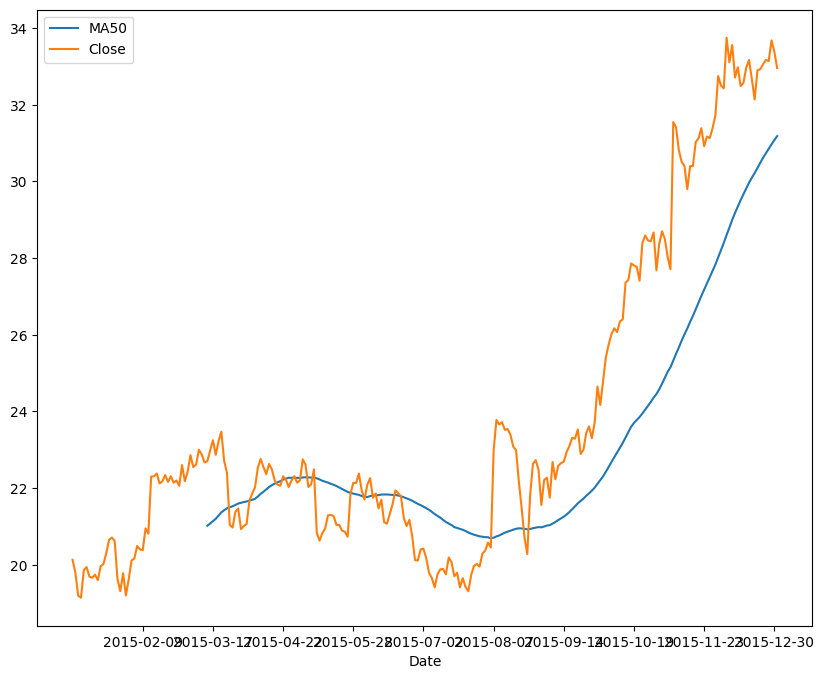

In [6]:
fb['ma50'] = fb['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

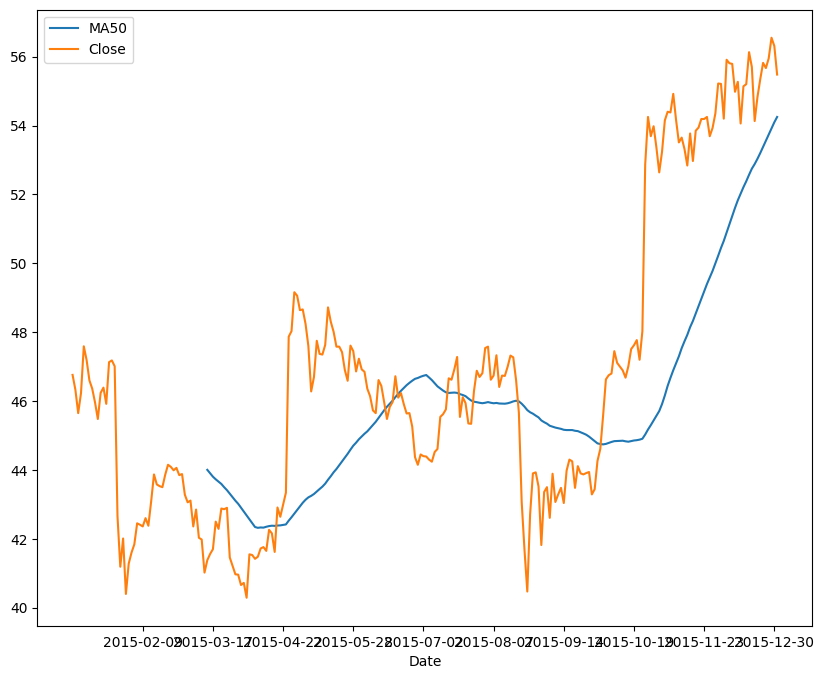

In [7]:
ms['ma50'] = ms['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

## Strategy

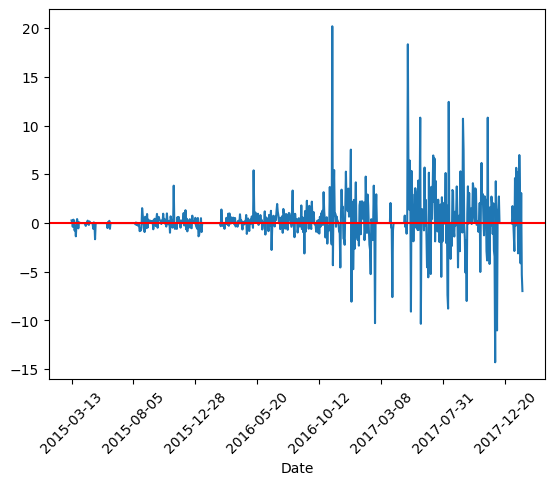

In [8]:
# add `MA10` and `MA50` column
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()

# add `Shares` column
fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]

# add close price of tomorrow NextClose
fb['NextClose'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'NextClose'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot()
plt.xticks(rotation = 45)
plt.axhline(y=0, color='red')

## Display wealth

Evaluate our strategy performance by looking at the total wealth we have.

Text(0.5, 1.0, 'Total money you win is 165.54001200000002')

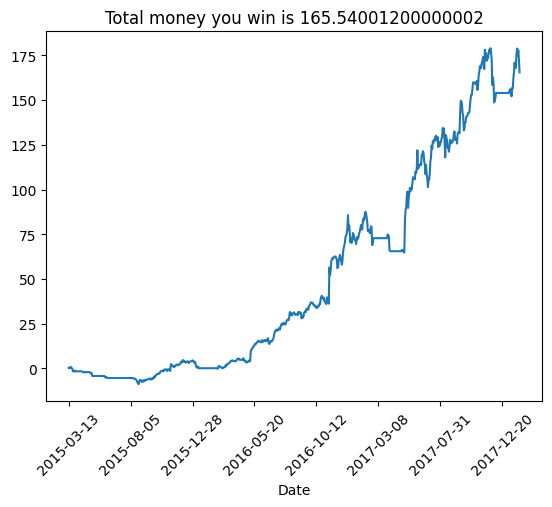

In [9]:
fb['wealth'] = fb['Profit'].cumsum()
fb['wealth'].plot()
plt.xticks(rotation = 45)
plt.title(f'Total money you win is {fb.loc[fb.index[-2], "wealth"]}')